In [1]:
import torch 
import matplotlib.pyplot as plt 
import numpy as np
import cv2
print(torch.__version__)

/Users/danyow/.local/share/virtualenvs/emotion-detection-avAA3HUE/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.8.0


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/danyow/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-6-15 Python-3.9.2 torch-1.8.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
# # cap = cv2.VideoCapture(0)
# cap= cv2.VideoCapture("Pedestrian.mp4")
# while cap.isOpened():
#     ret, frame = cap.read()
    
#     #进行检测
#     results = model(frame)
    
#     cv2.imshow('YOLO', np.squeeze(results.render()))
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

# 训练

In [4]:
import os 
import cv2 


In [5]:
# IMAGE_PATH = os.path.join("data/emo","images")
# labels= ["happy","sad"]
# number_imgs = 20


In [6]:
# cap = cv2.VideoCapture(0)
# # 类别之间的循环
# for label in labels:
#     print("collecting images for {}".format(label))
#     time.sleep(5)
#     # 图像之间的循环
#     for img_num in range(number_imgs):

#         print("collecting images for {},image number{}".format(label,img_num))

#         # 摄像头捕捉数据
#         ret,frame = cap.read()

#         #为图片文件取名
#         imgname = os.path.join(IMAGE_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
#         # 将图片写入文件 
#         cv2.imwrite(imgname, frame)
        
#         # 渲染屏幕
#         cv2.imshow('Image Collection', frame)
        
#         # 每次捕获间隔两秒
#         time.sleep(2)
        
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# cap.release()
# cv2.destroyAllWindows()

In [7]:
# Train YOLOv5s on COCO128 for 3 epochs
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 25 --data dataset.yaml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-252-g6a67594 Python-3.9.2 torch-1.8.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, 

In [ ]:
# !cd yolov5 && python3 detect.py --source /content/drive/MyDrive/face_mask_detection/face_data/test --weights /content/yolov5/runs/train/exp/weights/last.pt --img 416 --save-txt --save-conf

In [28]:
model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/exp13/weights/last.pt', source="local",force_reload=True)

YOLOv5 🚀 2022-6-15 Python-3.9.2 torch-1.8.0 CPU

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 


In [29]:
img = os.path.join('data/emo', 'test/images', 'happy-d0df666c-eb8e-11ec-81f1-acde48001122_jpg.rf.8c1d95d4903aaa819934ce6b25bad6ee.jpg')


In [42]:
results = model(img)

image 1/1: 416x416 1 happy
Speed: 12.2ms pre-process, 209.0ms inference, 0.8ms NMS per image at shape (1, 3, 640, 640)


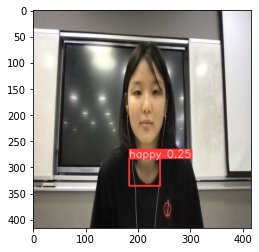

In [44]:
results.print()
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [41]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    
    text = results.print()
    print(text)
cap.release()
cv2.destroyAllWindows()

image 1/1: 720x1280 (no detections)
Speed: 4.9ms pre-process, 117.4ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)
None
image 1/1: 720x1280 1 happy
Speed: 4.4ms pre-process, 119.2ms inference, 0.7ms NMS per image at shape (1, 3, 384, 640)
None
image 1/1: 720x1280 1 happy
Speed: 3.4ms pre-process, 113.2ms inference, 0.9ms NMS per image at shape (1, 3, 384, 640)
None
image 1/1: 720x1280 (no detections)
Speed: 3.4ms pre-process, 111.0ms inference, 0.4ms NMS per image at shape (1, 3, 384, 640)
None
image 1/1: 720x1280 (no detections)
Speed: 2.7ms pre-process, 109.8ms inference, 0.8ms NMS per image at shape (1, 3, 384, 640)
None
image 1/1: 720x1280 (no detections)
Speed: 3.2ms pre-process, 103.2ms inference, 0.8ms NMS per image at shape (1, 3, 384, 640)
None
image 1/1: 720x1280 (no detections)
Speed: 2.8ms pre-process, 109.8ms inference, 0.5ms NMS per image at shape (1, 3, 384, 640)
None
image 1/1: 720x1280 (no detections)
Speed: 3.2ms pre-process, 103.2ms inference, 0.5ms NMS p